In [2]:
import os
from PIL import Image
import numpy as np

y_dirlist = os.listdir("C:/Users/aisha.xu/Downloads/tgs-salt-identification-challenge/train/masks/")
x_dirlist = os.listdir("C:/Users/aisha.xu/Downloads/tgs-salt-identification-challenge/train/images/")
y_train_name = []
x_train_name = []
for i in range(len(y_dirlist)):
    y_string = ['C:/Users/aisha.xu/Downloads/tgs-salt-identification-challenge/train/masks/',y_dirlist[i]]
    y_string = ''.join(y_string)
    y_train_name.append(y_string)
    
    x_string = ['C:/Users/aisha.xu/Downloads/tgs-salt-identification-challenge/train/images/',x_dirlist[i]]
    x_string = ''.join(x_string)
    x_train_name.append(x_string)
    
y_data=[]
x_data=[]
for filename in y_train_name:
    img = Image.open(filename)
    img_gray = img.convert('L')
    arr_gray = np.array(img_gray)
    arr_gray[arr_gray > 0]=1
    arr_gray_reshape = arr_gray.reshape(101,101,1)
    y_data.append(arr_gray_reshape)

for filename in x_train_name:
    img = Image.open(filename)
    img_gray = img.convert('L')
    arr = np.array(img_gray)
    arr_reshape = arr.reshape(101,101,1)
    x_data.append(arr_reshape)

    

In [4]:
#centre the data
x_data = (x_data-np.mean(x_data))/255
y_data = np.array(y_data)
x_train = x_data[:3000]
x_val = x_data[3000:]
y_train = y_data[:3000]
y_val = y_data[3000:]
#print(y_train.shape,type(x_train),type(y_train))

In [24]:
from numpy import *
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.callbacks import History

def unet(input_size=(101,101,1)):
    inputs = Input(shape = input_size)
    conv1 = Conv2D(64, kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(conv1)
    #print('conv1_shape=',conv1.shape)
    pool1 = MaxPooling2D(pool_size=(2,2),padding = 'same')(conv1)
    #print('pool1_shape=',pool1.shape)
    
    conv2 = Conv2D(128,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(conv2)
    #print('conv2_shape=',conv2.shape)
    pool2 = MaxPooling2D(pool_size=(2,2), padding = 'same')(conv2)
    #print('pool2_shape=',pool2.shape)
    
    conv3 = Conv2D(256,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(conv3)
    #print('conv3_shape=',conv3.shape)
    pool3 = MaxPooling2D(pool_size=(2,2), padding = 'same')(conv3)
    #print('pool3_shape=',pool3.shape)
    
    conv4 = Conv2D(512,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    #print('drop4_shape=',drop4.shape)
    pool4 = MaxPooling2D(pool_size=(2,2), padding = 'same')(drop4)
    #print('pool4_shape=',pool4.shape)
    
    conv5 = Conv2D(1024,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(conv5)
    #print('conv5_shape=',conv5.shape)
    drop5 = Dropout(0.5)(conv5)
    
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'valid', data_format='channels_last', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    #print('up6_shape=',up6.shape)
    merge6 = concatenate([drop4,up6], axis = 3)
    #print('merge6_shape=',merge6.shape)
    conv6 = Conv2D(512,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512,kernel_size=(3,3),activation = 'relu',data_format='channels_last',  padding = 'same',kernel_initializer = 'he_normal')(conv6)
    #print('conv6_shape=',conv6.shape)
    
    up7 = Conv2D(256,2,activation = 'relu',padding = 'same',data_format='channels_last',  kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    #print('up7_shape=',up7.shape)
    merge7 = concatenate([conv3,up7],axis=3)
    #print('merge7_shape=',merge7.shape)
    conv7 = Conv2D(256,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256,kernel_size=(3,3),activation = 'relu', data_format='channels_last', padding = 'same',kernel_initializer = 'he_normal')(conv7)
    #print('conv7_shape=',conv7.shape)
    
    up8 = Conv2D(128,2,activation = 'relu',padding = 'valid', data_format='channels_last', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    #print('up8_shape=',up8.shape)
    merge8 = concatenate([conv2,up8],axis=3)
    #print('merge8_shape=',merge8.shape)
    conv8 = Conv2D(128,kernel_size=(3,3),activation = 'relu',data_format='channels_last',  padding = 'same',kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128,kernel_size=(3,3),activation = 'relu',data_format='channels_last',  padding = 'same',kernel_initializer = 'he_normal')(conv8)
    #print('conv8_shape=',conv8.shape)
    
    up9 = Conv2D(64,2,activation = 'relu',padding = 'valid',data_format='channels_last',  kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    #print('up9_shape=',up9.shape)
    merge9 = concatenate([conv1,up9],axis=3)
    #print('merge9_shape=',merge9.shape)
    conv9 = Conv2D(64,kernel_size=(3,3),activation = 'relu',data_format='channels_last',  padding = 'same',kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64,kernel_size=(3,3),activation = 'relu',data_format='channels_last',  padding = 'same',kernel_initializer = 'he_normal')(conv9)
    #print('conv9_shape=',conv9.shape)
    
    conv10 = Conv2D(1,kernel_size=(1,1),data_format='channels_last', activation='sigmoid')(conv9)
    #print('conv10_Shape=',conv10.shape)
    
    model = Model(input = inputs, output = [conv10])
    model.compile(optimizer = Adam(lr=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model
model_unet = unet()

c:\users\aisha.xu\documents\env\lib\site-packages\ipykernel_launcher.py:75: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`


In [25]:

#train the model
history_unet = model_unet.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True,validation_data=(x_val, y_val))

#save the model
import pickle
filename_unet = 'MODEL_UNET.SAV'
pickle.dump(model_unet,open(filename_unet,'wb'))

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 175s 58ms/step - loss: 0.4701 - acc: 0.7591 - val_loss: 0.4032 - val_acc: 0.7767
Epoch 2/10
3000/3000 [==============================] - 172s 57ms/step - loss: 0.3851 - acc: 0.8309 - val_loss: 0.2963 - val_acc: 0.8903
Epoch 3/10
3000/3000 [==============================] - 171s 57ms/step - loss: 0.3095 - acc: 0.8844 - val_loss: 0.2814 - val_acc: 0.8950
Epoch 4/10
3000/3000 [==============================] - 171s 57ms/step - loss: 0.2685 - acc: 0.8995 - val_loss: 0.3238 - val_acc: 0.8817
Epoch 5/10
3000/3000 [==============================] - 171s 57ms/step - loss: 0.2306 - acc: 0.9147 - val_loss: 0.2352 - val_acc: 0.9096
Epoch 6/10
3000/3000 [==============================] - 169s 56ms/step - loss: 0.2150 - acc: 0.9200 - val_loss: 0.1952 - val_acc: 0.9263
Epoch 7/10
3000/3000 [==============================] - 170s 57ms/step - loss: 0.2073 - acc: 0.9260 - val_loss: 0.2076 - val_acc: 

ValueError: Illegal argument(s) to subplot: (2, 1)

In [45]:
#save the history
import json
with open('history_unet_saved.json', 'w') as f:
    json.dump(history_unet.history, f)

In [51]:
#load the history
with open('history_unet_saved.json') as json_file:
    saved_history = json.load(json_file)

[0.7591099902788798, 0.830928634484609, 0.8844111351966858, 0.8994908353487651, 0.9146616660753886, 0.9200408784548442, 0.9259829754829407, 0.9321224071184794, 0.9308818402290344, 0.9360859376589458]


In [26]:
#load the previously saved model and its summary
loaded_unetmodel = pickle.load(open(filename_unet,'rb'))
loaded_unetmodel.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 101, 101, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 101, 101, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 101, 101, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 51, 51, 64)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

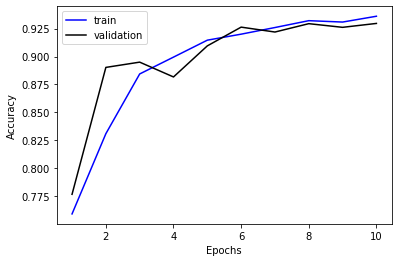

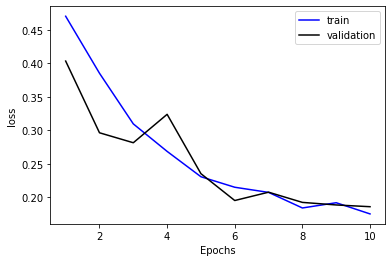

In [59]:
import matplotlib.pyplot as plt
unet_acc_train = saved_history['acc']
unet_loss_train = saved_history['loss']
unet_acc_val = saved_history['val_acc']
unet_loss_val = saved_history['val_loss']

plt.figure(0)
plt.plot(np.arange(1,11),unet_acc_train,'b-')
plt.plot(np.arange(1,11),unet_acc_val,'k-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(np.arange(1,11),unet_loss_train,'b-')
plt.plot(np.arange(1,11),unet_loss_val,'k-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])

plt.show()

C:/Users/aisha.xu/Downloads/tgs-salt-identification-challenge/train/images/0108518d1e.png


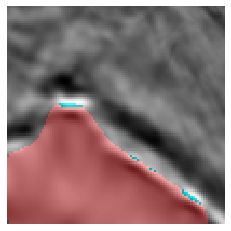

prediction


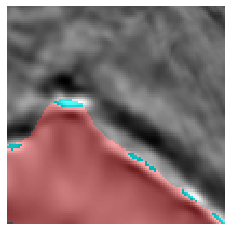

ground_truth


In [92]:
from random import randrange
a=(randrange(3000))

img_testtrain = Image.open(x_train_name[a])
img_array=np.array(img_testtrain)

test_mask = loaded_unetmodel.predict(x_data[a].reshape(1,101,101,1))
test_mask = test_mask.reshape(101,101)
print(x_train_name[10])


#print(img_array)
#print('\n','\n')
for i in range(101):
    for j in range(101):
        if test_mask[i][j] >0.9:
            img_array[i][j][0] += 80
            if img_array[i][j][0] >255:
                img_array[i][j][0] =255

#print(img_array)
#img_gray_testtrain = img_testtrain.convert('L')
#print(np.array(img_gray_testtrain))
#arr_testtrain = np.array(img_gray_testtrain)
#arr_reshape_testtrain = arr_testtrain.reshape(101,101,1)

print('prediction')
plt.figure(0)
plt.imshow(img_array)
plt.axis('off')
plt.show()


#loaded_unetmodel.predict()

img_array=np.array(img_testtrain)

real_mask = Image.open(y_train_name[a])
real_mask = real_mask.convert('L')
real_mask_array = np.array(real_mask)
real_mask_array[real_mask_array > 0]=1

for i in range(101):
    for j in range(101):
        if real_mask_array[i][j] >0.9:
            img_array[i][j][0] += 80
            if img_array[i][j][0] >255:
                img_array[i][j][0] =255

print('ground_truth')
plt.figure(1)
plt.imshow(img_array)
plt.axis('off')
plt.show()



In [78]:
img_testtrain = Image.open('C:/Users/aisha.xu/Downloads/tgs-salt-identification-challenge/train/images/0108518d1e.png)
test_mask = loaded_unetmodel.predict(x_data[10].reshape(1,101,101,1))
print(test_mask.reshape(101,101))
print(y_data[10].reshape(101,101))

[[9.0256411e-01 9.6500999e-01 9.8464727e-01 ... 6.0278177e-04
  2.8775036e-03 1.4614314e-02]
 [9.7050947e-01 9.8620754e-01 9.9394202e-01 ... 2.2283196e-04
  5.5119395e-04 1.6930103e-03]
 [9.9077499e-01 9.9625236e-01 9.9770296e-01 ... 1.3676286e-04
  2.8797984e-04 6.6992640e-04]
 ...
 [9.9997342e-01 9.9999839e-01 9.9999958e-01 ... 9.8695034e-01
  9.7939467e-01 9.5419669e-01]
 [9.9988770e-01 9.9999434e-01 9.9999899e-01 ... 9.8562503e-01
  9.7312891e-01 9.3145359e-01]
 [9.9910390e-01 9.9991786e-01 9.9998772e-01 ... 9.7367889e-01
  9.4965523e-01 8.4261662e-01]]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
